<a href="https://colab.research.google.com/github/farrelrassya/Machine-Learning-with-Imbalanced-Dataset-Udemy/blob/main/6_Gmean%2CDominance%2CIndexofImbalanced_Accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    recall_score,
    accuracy_score,
    balanced_accuracy_score,
)

from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

In [9]:
# load data
data = pd.read_csv('kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.00,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.00,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.00,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.00,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.00,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145746,98.61,20.66,2.07,37.0,-70.5,1015.7,0.67,-0.46,9.0,-76.5,...,416.9,1.73,2.49,9.0,-87.0,464.7,0.63,0.45,0.69,0
145747,73.15,24.85,0.61,32.5,-40.5,650.2,1.58,-0.05,2.5,-89.5,...,1354.3,0.05,-1.14,-4.0,-43.0,304.1,-0.02,0.10,-0.66,0
145748,100.00,71.76,41.92,954.5,-1039.0,-562.3,5.19,59.89,917.0,-1044.0,...,-236.2,3.56,11.87,47.0,-175.0,-245.3,3.41,0.44,0.78,1
145749,85.65,26.46,1.85,42.0,26.0,2738.3,-0.85,0.55,8.0,-84.0,...,1919.2,-0.34,-0.98,-16.0,-89.0,12.0,2.88,0.54,0.77,0


In [10]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [11]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [12]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [ ]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

True Positive Rate

$$ {TPR} = \text{Recall} = \frac{\text{tp}}{\text{tp} + \text{fn}} $$

The recall is the ratio `tp / (tp + fn)` where tp is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

In [15]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7111111111111111


True Negative Rate

TNR stands for "True Negative Rate," and it is a performance metric used in binary classification problems, typically in the context of evaluating the performance of a machine learning or statistical model. TNR is also sometimes referred to as "Specificity."

TNR measures the proportion of actual negative instances that were correctly classified as negatives by the model out of all the actual negatives

$$ {TNR} = \frac{\text{tn}}{\text{tn} + \text{fp}} $$


In [16]:
print('TNR Baseline test: ', recall_score(y_test, y_test_base, pos_label=0))
print('TNR Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=0))
print('TNR Logistic Regression test:', recall_score(y_test, logit.predict(X_test), pos_label=0))

TNR Baseline test:  1.0
TNR Random Forest test: 0.9999769165070058
TNR Logistic Regression test: 0.9996075806190993


G-Mean

The G-Mean, or Geometric Mean, is a performance metric that strikes a balance between a model's ability to correctly identify positive cases `Recall` and its ability to correctly identify negative cases `True Negative Rate`. It takes the geometric mean of these two values, offering a single score that reflects a model's overall performance. A higher G-Mean indicates a model that effectively balances the need to avoid missing positive cases while also minimizing false positive errors. It is particularly useful when you want to achieve a balanced trade-off between `sensitivity` and `specificity`, which is important in various classification tasks.

$$ {G-Mean} = \sqrt{\frac{\text{tp}}{\text{tp} + \text{fn}} \cdot \frac{\text{tn}}{\text{tn} + \text{fp}}} $$

$$ {G-Mean} = \sqrt{\text{Recall} \times \text{TNR}} $$



In [17]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8431085679372124


Dominance

Represents the difference between the True Positive Rate `TPR or Recall` and the True Negative Rate `TNR`. In other words, it measures the relative dominance of one of these rates over the other.

$$ {Dominance} = \text{True Positive Rate (TPR)} - \text{True Negative Rate (TNR)} $$


In [18]:
def dominance(y_true, y_pred):
    tpr = recall_score(y_test, y_pred, pos_label=1)
    tnr = recall_score(y_test, y_pred, pos_label=0)
    return tpr - tnr


In [19]:
print('Dominance Baseline test: ', dominance(y_test, y_test_base))
print('Dominance Random Forest test:', dominance(y_test, rf.predict(X_test)))
print('Dominance Logistic Regression test:', dominance(y_test, logit.predict(X_test)))

Dominance Baseline test:  -1.0
Dominance Random Forest test: -0.39750778070453663
Dominance Logistic Regression test: -0.28849646950798813


Baseline model is more inclined toward correctly identifying negative cases and minimizing false positives rather than correctly identifying positive cases.

Value indicates a slight bias towards TNR, but it's not as strong as in the Baseline model. value implies that the Logistic Regression model still emphasizes TNR but to a lesser degree.

Dominance values provide insights into how these models prioritize specificity (TNR) over sensitivity (TPR) in their classification decisions. A negative Dominance value indicates a bias toward TNR, while a positive value would suggest a bias toward TPR.

Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

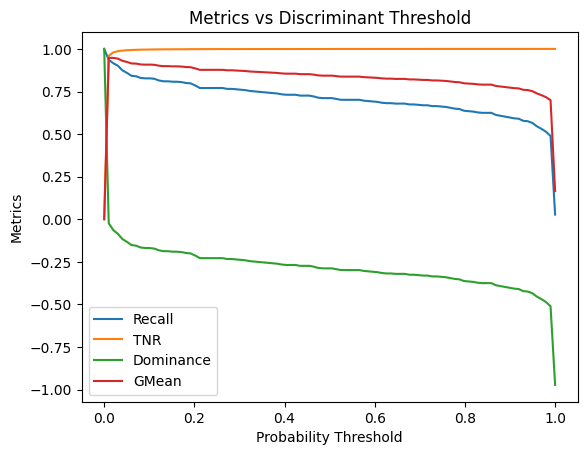

In [20]:
# list of thresholds
thresholds = np.linspace(0, 1, 100)

# list co collect values
recall_ls = []
tnr_ls = []
dominance_ls = []
gmean_ls = []

# obtain probabilities
probs_logit = logit.predict_proba(X_test)[:, 1]

# calculate G-Mean based on thresholds
for threshold in thresholds:

    # obtain class prediction based on threshold
    preds_logit = np.where(probs_logit >= threshold, 1, 0)

    # obtain metrics
    recall_ls.append(recall_score(y_test, preds_logit, pos_label=1))
    tnr_ls.append((recall_score(y_test, preds_logit, pos_label=0)))
    dominance_ls.append(dominance(y_test, preds_logit))
    gmean_ls.append(geometric_mean_score(y_test, preds_logit))


# after loop concatenate metrics
metrics = pd.concat([
    pd.Series(recall_ls),
    pd.Series(tnr_ls),
    pd.Series(dominance_ls),
    pd.Series(gmean_ls)], axis=1)

# add column names and thresholds in index
metrics.columns = ['Recall', 'TNR', 'Dominance', 'GMean']
metrics.index = thresholds

# plot
metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')

## **Index of Imbalanced Accuracy** ##

In [21]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, logit.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8431085679372124


In [25]:
gmean = make_index_balanced_accuracy(alpha=0.5, squared=True)(geometric_mean_score)

print('Corrected G-Mean Baseline test: ', gmean(y_test, y_test_base))
print('Corrected G-Mean Random Forest test:', gmean(y_test, rf.predict(X_test)))
print('Corrected G-Mean Logistic Regression test:', gmean(y_test, logit.predict(X_test)))

Corrected G-Mean Baseline test:  0.0
Corrected G-Mean Random Forest test: 0.6024552287103938
Corrected G-Mean Logistic Regression test: 0.7108320573291372


In [26]:
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, logit.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9969354617390112


In [27]:
acc = make_index_balanced_accuracy(alpha=0.5, squared=True)(accuracy_score)

print('Corrected Accuracy Baseline test: ', acc(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', acc(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', acc(y_test, logit.predict(X_test)))

Corrected Accuracy Baseline test:  0.4907806705467988
Corrected Accuracy Random Forest test: 0.7953200510570445
Corrected Accuracy Logistic Regression test: 0.8505148338956338
